## linear regression II

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas as pd 
import time
import matplotlib.pyplot as plt
from mylib import *

<font style='font-size:20px; line-height:26px;'>

Here is a plot showing the relation between vehicle's MPG (Miles Per Gallon) and its weight:

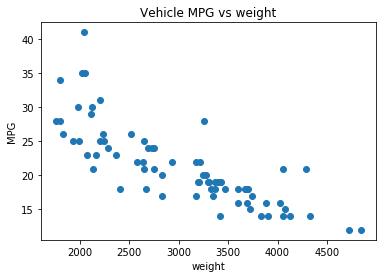

We natually concluded from the downward slopping points that "the heavier the vehicle is, the worse the MPG". If we want to be more precisely, we need to use a regression analysis. In this case it is a single variable regression:

$$ y_i=\alpha +\beta x_i+\epsilon_i $$

where $y_i$ is the observed MPG of a vehicle, and $x_i$ is the weight of the vehicle. We open use the LHS and RHS to distinguash the Y and X, or dependent variable (y) and regressors (X)

More generally, we should consider the MPG is not only determined by the wieght, but also by other design factors: length, displacement (排气量）， headroom (车厢净高）..., we can use a multivariate-linear-gression:

$$ y_i=\alpha +\beta_1 x_{1i}+\beta_2 x_{2i}+...+\beta_k x_{ki}+\epsilon_i   \quad \quad i=1,2,..,n$$

In the matrix form. this is

$$ \left[ \begin{array} {}y_1\\y_2\\.\\.\\y_n \end{array} \right]=\left[ \begin{array} {} 1 & x_{11} &. . .& x_{1k} \\1 & x_{21}&. . .& x_{2k} \\. & .& ... & . \\. & .& ...& . \\1 & x_{n1} &. . .& x_{nk} \\ \end{array} \right] \left[ \begin{array} {}\alpha \\ \beta_1 \\. \\ \beta_k \end{array} \right] + \left[ \begin{array} {}\epsilon_1\\\epsilon_2\\.\\.\\\epsilon_n \end{array} \right]$$

or

$$Y=X\beta+\epsilon$$

The $\beta $ should be selected such that the sum of error squared is to be minimized

$$ J=\sum_{i=1}^{n} (y_i-X_i\beta)^2 $$

In matrix notation, 

$$ J=(Y-X\beta)'(Y-X\beta) =Y'Y-2(X\beta)'Y+(X\beta)'(X\beta)$$

then 

$$ \frac{\partial J}{\partial \beta}=-2X'Y+2(X\beta)'X $$

solve it at $\frac{\partial J}{\partial \beta}=0$ we have 

$$ \hat{\beta}= (X'X)^{-1}X'Y $$

We call X the information matrix. 
</font>

### Analysing auto file

In [3]:
## here is the dataset
#df=pd.read_csv('auto.csv') 
df=pd.read_stata('/Users/dongwenou/Downloads/Intro to DS/auto.dta') 
df

make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
0     AMC Concord   4099   22    3.0       2.5     11    2930     186    40   
1       AMC Pacer   4749   17    3.0       3.0     11    3350     173    40   
2      AMC Spirit   3799   22    NaN       3.0     12    2640     168    35   
3   Buick Century   4816   20    3.0       4.5     16    3250     196    40   
4   Buick Electra   7827   15    4.0       4.0     20    4080     222    43   
..            ...    ...  ...    ...       ...    ...     ...     ...   ...   
69      VW Dasher   7140   23    4.0       2.5     12    2160     172    36   
70      VW Diesel   5397   41    5.0       3.0     15    2040     155    35   
71      VW Rabbit   4697   25    4.0       3.0     15    1930     155    35   
72    VW Scirocco   6850   25    4.0       2.0     16    1990     156    36   
73      Volvo 260  11995   17    5.0       2.5     14    3170     193    37   

    displacement  gear_ratio   foreign  
0            121        3.58  Domestic  
1            258        2.53  Domestic  
2            121        3.08  Domestic  
3            196        2.93  Domestic  
4            350        2.41  Domestic  
..           ...         ...       ...  
69            97        3.74   Foreign  
70            90        3.78   Foreign  
71            89        3.78   Foreign  
72            97        3.78   Foreign  
73           163        2.98   Foreign  

[74 rows x 12 columns]

In [51]:
df_ = pd.get_dummies(df, columns = ['foreign'], drop_first=True)
df_

make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
0     AMC Concord   4099   22    3.0       2.5     11    2930     186    40   
1       AMC Pacer   4749   17    3.0       3.0     11    3350     173    40   
2      AMC Spirit   3799   22    NaN       3.0     12    2640     168    35   
3   Buick Century   4816   20    3.0       4.5     16    3250     196    40   
4   Buick Electra   7827   15    4.0       4.0     20    4080     222    43   
..            ...    ...  ...    ...       ...    ...     ...     ...   ...   
69      VW Dasher   7140   23    4.0       2.5     12    2160     172    36   
70      VW Diesel   5397   41    5.0       3.0     15    2040     155    35   
71      VW Rabbit   4697   25    4.0       3.0     15    1930     155    35   
72    VW Scirocco   6850   25    4.0       2.0     16    1990     156    36   
73      Volvo 260  11995   17    5.0       2.5     14    3170     193    37   

    displacement  gear_ratio  foreign_Foreign  
0            121        3.58            False  
1            258        2.53            False  
2            121        3.08            False  
3            196        2.93            False  
4            350        2.41            False  
..           ...         ...              ...  
69            97        3.74             True  
70            90        3.78             True  
71            89        3.78             True  
72            97        3.78             True  
73           163        2.98             True  

[74 rows x 12 columns]

In [4]:
df.describe().T

count         mean          std      min      25%       50%  \
price          74.0  6165.256757  2949.495885  3291.00  4220.25  5006.500   
mpg            74.0    21.297297     5.785503    12.00    18.00    20.000   
rep78          69.0     3.405797     0.989932     1.00     3.00     3.000   
headroom       74.0     2.993243     0.845995     1.50     2.50     3.000   
trunk          74.0    13.756757     4.277404     5.00    10.25    14.000   
weight         74.0  3019.459459   777.193567  1760.00  2250.00  3190.000   
length         74.0   187.932432    22.266340   142.00   170.00   192.500   
turn           74.0    39.648649     4.399354    31.00    36.00    40.000   
displacement   74.0   197.297297    91.837219    79.00   119.00   196.000   
gear_ratio     74.0     3.014865     0.456287     2.19     2.73     2.955   

                    75%       max  
price         6332.2500  15906.00  
mpg             24.7500     41.00  
rep78            4.0000      5.00  
headroom         3.5000      5.00  
trunk           16.7500     23.00  
weight        3600.0000   4840.00  
length         203.7500    233.00  
turn            43.0000     51.00  
displacement   245.2500    425.00  
gear_ratio       3.3525      3.89

<font style='font-size:20px; line-height:26px;'>
    
Some variable in this dataset need more clearification: 

- rep78 measures a car's repair record in 1978, it is a categorical variable, rangeing from 1 to 5
- foreigh  label for welther the model is foreign made of US made
- displacement	commonly used to measure the power of engine

</font>

In [4]:
def ols(y, X1):
    XX=X1.T.dot(X1)
    XY=X1.T.dot(y)
    Coef=np.matrix(XX).I.dot(XY)
    return Coef.tolist()[0]

nobs=df.shape[0]
y = df[["mpg"]].squeeze()
df.insert(0,"one",1)
X1=df[['one','weight']]

betahat=ols(y, X1)
print(betahat)

[39.440283530718084, -0.006008686811999345]


In [5]:
df

one           make  price  mpg  rep78  headroom  trunk  weight  length  \
0     1    AMC Concord   4099   22    3.0       2.5     11    2930     186   
1     1      AMC Pacer   4749   17    3.0       3.0     11    3350     173   
2     1     AMC Spirit   3799   22    NaN       3.0     12    2640     168   
3     1  Buick Century   4816   20    3.0       4.5     16    3250     196   
4     1  Buick Electra   7827   15    4.0       4.0     20    4080     222   
..  ...            ...    ...  ...    ...       ...    ...     ...     ...   
69    1      VW Dasher   7140   23    4.0       2.5     12    2160     172   
70    1      VW Diesel   5397   41    5.0       3.0     15    2040     155   
71    1      VW Rabbit   4697   25    4.0       3.0     15    1930     155   
72    1    VW Scirocco   6850   25    4.0       2.0     16    1990     156   
73    1      Volvo 260  11995   17    5.0       2.5     14    3170     193   

    turn  displacement  gear_ratio   foreign  
0     40           121        3.58  Domestic  
1     40           258        2.53  Domestic  
2     35           121        3.08  Domestic  
3     40           196        2.93  Domestic  
4     43           350        2.41  Domestic  
..   ...           ...         ...       ...  
69    36            97        3.74   Foreign  
70    35            90        3.78   Foreign  
71    35            89        3.78   Foreign  
72    36            97        3.78   Foreign  
73    37           163        2.98   Foreign  

[74 rows x 13 columns]

Text(0, 0.5, 'MPG')

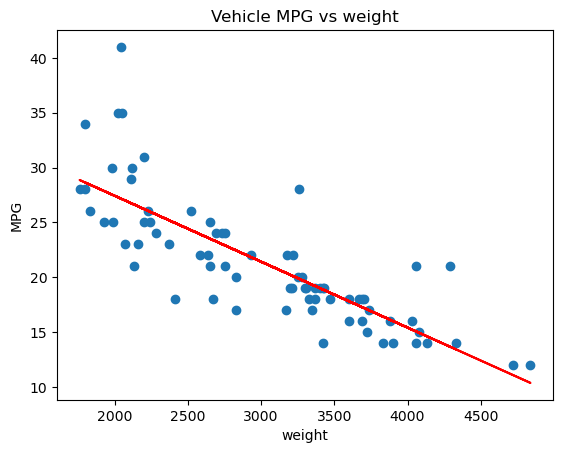

In [7]:
def getYhat(X,betas):
    yhat=np.zeros(X.shape[0])
    for v,beta in zip(X, betas):
        #print(beta, v)
        yhat+=X[v]*beta
    return yhat
    
yhat=getYhat(X1,betahat)

_=plt.scatter(df.weight, df.mpg)
plt.title("Vehicle MPG vs weight")
plt.plot(df.weight, yhat, c='red')
plt.xlabel("weight")
plt.ylabel("MPG")


### Prediction plot

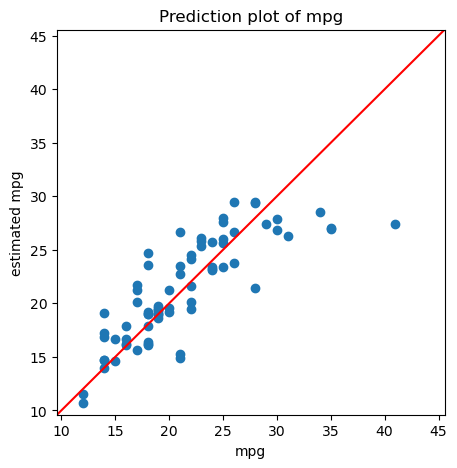

In [10]:
def predictPlot(y, yhat):
    ymin=min(np.min(y), np.min(yhat))*0.9
    ymax=max(np.max(y), np.max(yhat))/0.9
    plt.subplots(figsize=(5,5))
    _=plt.scatter(y, yhat)
    plt.title('Prediction plot of '+y.name)
    plt.xlim(ymin, ymax)
    plt.ylim(ymin, ymax)
    plt.plot([ymin,ymax], [ymin,ymax], c='red')
    plt.ylabel("estimated "+y.name)
    plt.xlabel(y.name)

predictPlot(y,yhat)

### Multivariate linear regression  


In [8]:
rhs=['one','weight','length', 'displacement', 'headroom', 'trunk']
X1=df[rhs]
betahat=ols(y, X1)
print(betahat)

[47.689655680285696, -0.004394318904706357, -0.07169413358615694, 0.004369364899045768, -0.016067683376041822, -0.033743933348852936]


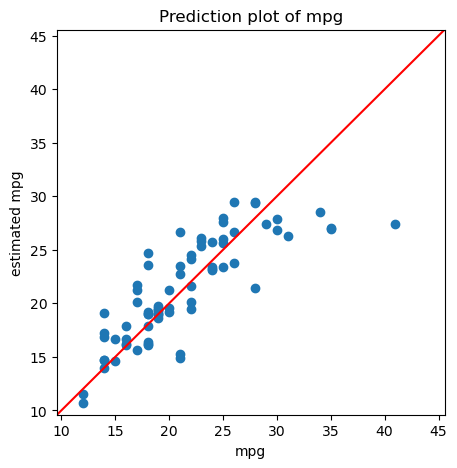

In [11]:
yhat=getYhat(X1,betahat)
predictPlot(y,yhat)

### How good is the fit?

<font style='font-size:18px; line-height:24px;'>
The goodness of fit, $R^2$ is the overall measurement for how good the variations of the dependent variable is explained by the model. It is derived from identity

$$\sum_{i=1}^n (Y_i−\bar{Y})^2 =\sum_{i=1}^n (\hat{Y}_i-\bar{\hat{Y}})^2 +\sum_{i=1}^n\hat{\epsilon}^2 $$

which is denoted as  $SST=SSE+SSR$, or 

$\quad\quad\quad\quad\quad$ Sum of Squared Total = Sum of Squared Explained + Sum of Squared Residuals

divived the bothside by SST, we have 

$$1=\frac{SSE}{SST}+\frac {SSR}{SST}$$

thus $R^2$ is defined as 

$$  R^2=\frac{SSE}{SST}=1-\frac {SSR}{SST}$$

Note. Goodness of fit is also be referenced as "coefficient of determination".

$R^2$ will always increase when more regressors are added to the modle. If we want to know  whether adding additional predictors improve a regression model or not, we need to use 

$$adjustedR^2= 1-\frac{(1-R^2)(n-1)}{n-k-1}$$</b>

<font style='color:red'>Warning, Do not confuse the SSE as Sum of Squared Error</font>
</font>



In [12]:
def OLS(y, X1, toPrint=False):
    nobs=X1.shape[0]
    nRHS=X1.shape[1]-1
    XX=X1.T.dot(X1)
    XY=X1.T.dot(y)
    Coef=(np.matrix(XX).I.dot(XY)).tolist()[0]
    yhat=getYhat(X1,Coef)
    ymean=np.mean(y)
    SST=(y-ymean).dot(y-ymean)
    SSE=(yhat-ymean).dot(yhat-ymean)
    R2=SSE/SST
    adjR2=1-(1-R2)*(nobs-1)/(nobs-nRHS-1)
    MSE=(SST-SSE)/(nobs-nRHS-1) 
    if toPrint:
        print('--------------------OLS -----------------------')
        print('nObs'.ljust(10), str(nobs).rjust(10), end='    ')
        print('nRegressor'.ljust(10), str(nRHS).rjust(10))
        print('SST'.ljust(10), ('%.3f' % SST).rjust(10), end='    ')
        print('SSE'.ljust(10), ('%.3f' % SSE).rjust(10))
        print('R2'.ljust(10), ('%.3f' %R2).rjust(10), end='    ') 
        print('adjR2'.ljust(10), ('%.3f' %adjR2).rjust(10))  
        print('MSE'.ljust(10), ('%.3f' %MSE).rjust(10), end='    ')  
        print('RMSE'.ljust(10), ('%.3f' % np.sqrt(MSE)).rjust(10))  
        print('-----------------------------------------------')
        for v, beta in zip(X1, Coef):
            print(v.ljust(14), ('%.4f' % beta).rjust(12))
        print('----------------------------')
    return Coef, SST,SSE,R2, MSE, yhat

_=OLS(y, X1, True)


--------------------OLS -----------------------
nObs               74    nRegressor          5
SST          2443.459    SSE          1619.032
R2              0.663    adjR2           0.638
MSE            12.124    RMSE            3.482
-----------------------------------------------
one                 47.6897
weight              -0.0044
length              -0.0717
displacement         0.0044
headroom            -0.0161
trunk               -0.0337
----------------------------


### Dealing with the missings

Missing number should be excluded from the information matrix X, which does not mean that you should eliminate all records containing missing value: some variable may not end up in the model. Dropping too many records is never be a good thing and should be avoid. 

In [13]:
df=df.dropna()
y=df.mpg
nobs=len(df)
df.describe().T

count         mean          std      min      25%      50%  \
one            69.0     1.000000     0.000000     1.00     1.00     1.00   
price          69.0  6146.043478  2912.440252  3291.00  4195.00  5079.00   
mpg            69.0    21.289855     5.866408    12.00    18.00    20.00   
rep78          69.0     3.405797     0.989932     1.00     3.00     3.00   
headroom       69.0     3.000000     0.853195     1.50     2.50     3.00   
trunk          69.0    13.927536     4.343077     5.00    11.00    15.00   
weight         69.0  3032.028986   792.851480  1760.00  2240.00  3200.00   
length         69.0   188.289855    22.747399   142.00   170.00   193.00   
turn           69.0    39.797101     4.441051    31.00    36.00    40.00   
displacement   69.0   198.000000    93.147890    79.00   119.00   196.00   
gear_ratio     69.0     2.999275     0.462682     2.19     2.73     2.93   

                 75%       max  
one              1.0      1.00  
price         6303.0  15906.00  
mpg             24.0     41.00  
rep78            4.0      5.00  
headroom         3.5      5.00  
trunk           17.0     23.00  
weight        3670.0   4840.00  
length         204.0    233.00  
turn            43.0     51.00  
displacement   250.0    425.00  
gear_ratio       3.3      3.89

### Dealing with categorical variable

Categorical variable need to be converted to a group of dummies even though under some situation you could tread categorical variable as 'quatitative' variable (of uncontinuous value). This can be acceptable if 

- the value of categorical variable is coded in proper order
- the impact of each category to the LHS is proportion to its value


In [14]:
df['foreign']

0     Domestic
1     Domestic
3     Domestic
4     Domestic
5     Domestic
        ...   
69     Foreign
70     Foreign
71     Foreign
72     Foreign
73     Foreign
Name: foreign, Length: 69, dtype: category
Categories (2, object): ['Domestic' < 'Foreign']

In [12]:
df['rep78']

0     3.0
1     3.0
3     3.0
4     4.0
5     3.0
     ... 
69    4.0
70    5.0
71    4.0
72    4.0
73    5.0
Name: rep78, Length: 69, dtype: float64

In [13]:
pd.get_dummies(df['rep78']) # one-hot encoding

1.0    2.0    3.0    4.0    5.0
0   False  False   True  False  False
1   False  False   True  False  False
3   False  False   True  False  False
4   False  False  False   True  False
5   False  False   True  False  False
..    ...    ...    ...    ...    ...
69  False  False  False   True  False
70  False  False  False  False   True
71  False  False  False   True  False
72  False  False  False   True  False
73  False  False  False  False   True

[69 rows x 5 columns]

In [15]:
## since it is just one column, 
df['iForeign']=pd.get_dummies(df['foreign'])['Foreign']
df
#df['iForeign']=pd.get_dummies(df['foreign'])['Foreign']
#pd.get_dummies(df)
#pd.get_dummies(data = df, columns = ['foreign'])
#help(pd.get_dummies)

/var/folders/_v/z97dbq5n0msfsdk6k58jt2380000gn/T/ipykernel_74184/3809683534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['iForeign']=pd.get_dummies(df['foreign'])['Foreign']


one           make  price  mpg  rep78  headroom  trunk  weight  length  \
0     1    AMC Concord   4099   22    3.0       2.5     11    2930     186   
1     1      AMC Pacer   4749   17    3.0       3.0     11    3350     173   
3     1  Buick Century   4816   20    3.0       4.5     16    3250     196   
4     1  Buick Electra   7827   15    4.0       4.0     20    4080     222   
5     1  Buick LeSabre   5788   18    3.0       4.0     21    3670     218   
..  ...            ...    ...  ...    ...       ...    ...     ...     ...   
69    1      VW Dasher   7140   23    4.0       2.5     12    2160     172   
70    1      VW Diesel   5397   41    5.0       3.0     15    2040     155   
71    1      VW Rabbit   4697   25    4.0       3.0     15    1930     155   
72    1    VW Scirocco   6850   25    4.0       2.0     16    1990     156   
73    1      Volvo 260  11995   17    5.0       2.5     14    3170     193   

    turn  displacement  gear_ratio   foreign  iForeign  
0     40           121        3.58  Domestic     False  
1     40           258        2.53  Domestic     False  
3     40           196        2.93  Domestic     False  
4     43           350        2.41  Domestic     False  
5     43           231        2.73  Domestic     False  
..   ...           ...         ...       ...       ...  
69    36            97        3.74   Foreign      True  
70    35            90        3.78   Foreign      True  
71    35            89        3.78   Foreign      True  
72    36            97        3.78   Foreign      True  
73    37           163        2.98   Foreign      True  

[69 rows x 14 columns]

In [19]:
type(df['iForeign'][0])

numpy.bool_

In [22]:
# X1=df[['one','weight','length', 'displacement', 'headroom', 'trunk', 'iForeign']]
X1 = df[['one', 'weight', 'length', 'displacement', 'headroom', 'trunk', 'iForeign']].astype(float)
y = y.astype(float)  # 将 y 也转换为浮点型
print(X1)
_=OLS(y, X1, True)

    one  weight  length  displacement  headroom  trunk  iForeign
0   1.0  2930.0   186.0         121.0       2.5   11.0       0.0
1   1.0  3350.0   173.0         258.0       3.0   11.0       0.0
3   1.0  3250.0   196.0         196.0       4.5   16.0       0.0
4   1.0  4080.0   222.0         350.0       4.0   20.0       0.0
5   1.0  3670.0   218.0         231.0       4.0   21.0       0.0
..  ...     ...     ...           ...       ...    ...       ...
69  1.0  2160.0   172.0          97.0       2.5   12.0       1.0
70  1.0  2040.0   155.0          90.0       3.0   15.0       1.0
71  1.0  1930.0   155.0          89.0       3.0   15.0       1.0
72  1.0  1990.0   156.0          97.0       2.0   16.0       1.0
73  1.0  3170.0   193.0         163.0       2.5   14.0       1.0

[69 rows x 7 columns]
--------------------OLS -----------------------
nObs               69    nRegressor          6
SST          2340.203    SSE          1574.293
R2              0.673    adjR2           0.641
MSE     

In [21]:
X1=df[['one', 'price','rep78','headroom','trunk','weight','length','turn','displacement','gear_ratio','iForeign']].astype(float)
_=OLS(y, X1, True)

--------------------OLS -----------------------
nObs               69    nRegressor         10
SST          2340.203    SSE          1674.511
R2              0.716    adjR2           0.666
MSE            11.477    RMSE            3.388
-----------------------------------------------
one                 41.1040
price               -0.0001
rep78                1.1926
headroom             0.0229
trunk               -0.0522
weight              -0.0028
length              -0.1006
turn                -0.1629
displacement         0.0116
gear_ratio           3.3379
iForeign            -4.0518
----------------------------


### compare to stata's reg output <br>
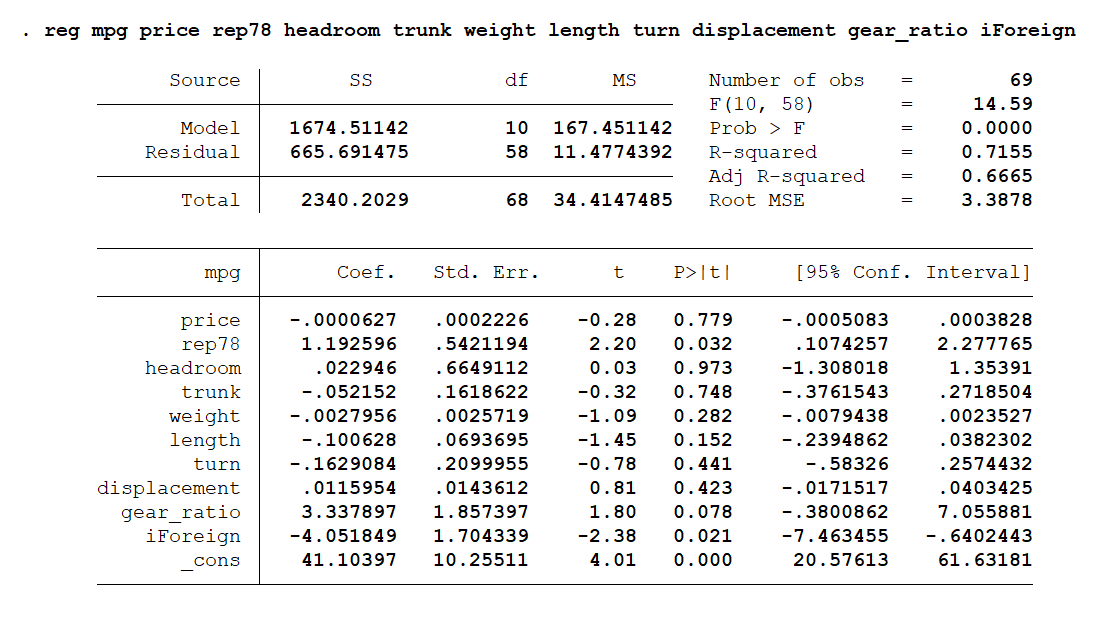

### Using the statsmodels.api

In [23]:
import statsmodels.api as sm
model1 = sm.OLS(y, X1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     21.24
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           2.26e-13
Time:                        16:06:38   Log-Likelihood:                -180.95
No. Observations:                  69   AIC:                             375.9
Df Residuals:                      62   BIC:                             391.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
one             52.1029      7.154      7.283   

### Should rep78 be treated as categorical variable?

In [24]:
df['rep78']

0     3.0
1     3.0
3     3.0
4     4.0
5     3.0
     ... 
69    4.0
70    5.0
71    4.0
72    4.0
73    5.0
Name: rep78, Length: 69, dtype: float64

In [25]:
pd.get_dummies(df['rep78'].astype(np.int8))

1      2      3      4      5
0   False  False   True  False  False
1   False  False   True  False  False
3   False  False   True  False  False
4   False  False  False   True  False
5   False  False   True  False  False
..    ...    ...    ...    ...    ...
69  False  False  False   True  False
70  False  False  False  False   True
71  False  False  False   True  False
72  False  False  False   True  False
73  False  False  False  False   True

[69 rows x 5 columns]

In [26]:
rep78Dummy = pd.get_dummies(df['rep78'].astype(np.int8),prefix_sep='_',
                          drop_first=True, prefix='rep')
print(rep78Dummy)
df=df.merge(rep78Dummy, left_index=True, right_index=True)
print(df.describe().T)

    rep_2  rep_3  rep_4  rep_5
0   False   True  False  False
1   False   True  False  False
3   False   True  False  False
4   False  False   True  False
5   False   True  False  False
..    ...    ...    ...    ...
69  False  False   True  False
70  False  False  False   True
71  False  False   True  False
72  False  False   True  False
73  False  False  False   True

[69 rows x 4 columns]
              count         mean          std      min      25%      50%  \
one            69.0     1.000000     0.000000     1.00     1.00     1.00   
price          69.0  6146.043478  2912.440252  3291.00  4195.00  5079.00   
mpg            69.0    21.289855     5.866408    12.00    18.00    20.00   
rep78          69.0     3.405797     0.989932     1.00     3.00     3.00   
headroom       69.0     3.000000     0.853195     1.50     2.50     3.00   
trunk          69.0    13.927536     4.343077     5.00    11.00    15.00   
weight         69.0  3032.028986   792.851480  1760.00  2240.00  3200.00 

left_index=True：使用 `df` 的索引作为合并键。
right_index=True：使用 `rep78Dummy` 的索引作为合并键。
to_pickle() 会将 `DataFrame` 序列化并保存，在以后可以通过 `pd.read_pickle()` 快速加载回内存。

In [27]:
# Data processing is done. Save a copy
df.to_pickle('auto_processed.zip')
#df.to_csv('auto___.csv')
## After saving to file, disable this statement to prevent accidental override

In [29]:
df=pd.read_pickle('auto_processed.zip')
X=df[['one', 'price','headroom','trunk','weight','length','turn','displacement','gear_ratio','iForeign',
      'rep78']].astype(float)
y=df['mpg']
_=OLS(y, X, toPrint=True) 

--------------------OLS -----------------------
nObs               69    nRegressor         10
SST          2340.203    SSE          1674.511
R2              0.716    adjR2           0.666
MSE            11.477    RMSE            3.388
-----------------------------------------------
one                 41.1040
price               -0.0001
headroom             0.0229
trunk               -0.0522
weight              -0.0028
length              -0.1006
turn                -0.1629
displacement         0.0116
gear_ratio           3.3379
iForeign            -4.0518
rep78                1.1926
----------------------------


In [31]:
# adjust R^2 become larger
df=pd.read_pickle('auto_processed.zip')
X=df[['one', 'price','headroom','trunk','weight','length','turn','displacement','gear_ratio','iForeign',
      'rep_2', 'rep_3','rep_4', 'rep_5']].astype(float)
y=df['mpg']
_=OLS(y, X, toPrint=True) 

--------------------OLS -----------------------
nObs               69    nRegressor         13
SST          2340.203    SSE          1772.817
R2              0.758    adjR2           0.700
MSE            10.316    RMSE            3.212
-----------------------------------------------
one                 43.3600
price               -0.0001
headroom             0.0225
trunk                0.0403
weight              -0.0015
length              -0.1396
turn                -0.2530
displacement         0.0197
gear_ratio           5.3014
iForeign            -5.0773
rep_2                0.5744
rep_3               -0.7348
rep_4                0.3856
rep_5                4.8374
----------------------------


### Compared to built-in function

In [33]:
df=pd.read_pickle('auto_processed.zip')
X2=df[['one', 'price','headroom','trunk','weight','length','turn','displacement','gear_ratio','iForeign',
      'rep_2', 'rep_3','rep_4', 'rep_5']].astype(float)
y=df['mpg']
_=OLS(y, X2, toPrint=True) 

--------------------OLS -----------------------
nObs               69    nRegressor         13
SST          2340.203    SSE          1772.817
R2              0.758    adjR2           0.700
MSE            10.316    RMSE            3.212
-----------------------------------------------
one                 43.3600
price               -0.0001
headroom             0.0225
trunk                0.0403
weight              -0.0015
length              -0.1396
turn                -0.2530
displacement         0.0197
gear_ratio           5.3014
iForeign            -5.0773
rep_2                0.5744
rep_3               -0.7348
rep_4                0.3856
rep_5                4.8374
----------------------------


In [35]:
X2=df[['one', 'price','headroom','trunk','weight','length','turn','displacement','gear_ratio','iForeign',
      'rep_2', 'rep_3','rep_4', 'rep_5']].astype(float)
y=df['mpg']
model2 = sm.OLS(y, X2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     13.22
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           1.45e-12
Time:                        16:17:58   Log-Likelihood:                -170.60
No. Observations:                  69   AIC:                             369.2
Df Residuals:                      55   BIC:                             400.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
one             43.3600      9.881      4.388   

### A form of OOP

In [36]:
def getYhat(X,betas):
    yhat=np.zeros(X.shape[0])
    for v,beta in zip(X, betas):
        yhat+=X[v]*beta
    return yhat 

In [63]:
class LinReg:
    def __init__(self,dataFn,toDrop=None):
        self.df=pd.read_pickle(dataFn)
        self.nobs=self.df.shape[0]
        if toDrop!=None:
            for v in toDrop:
                del self.df[v]       

    def fit(self, iy, iXs, toPrint=False):
        assert iy not in iXs, 'LHS variable found in the RHS list'
        if type(iy)==int:
            iy = list([iy])
        self.iy=iy
        self.RHS = list(self.df.columns[list(iXs)])  # 自变量名称列表
        self.LHS = list(self.df.columns[list(iy)])  # 因变量名称列表
        y = self.df[self.LHS].squeeze()
        # squeeze() 将 DataFrame 中的一列转换为 Series，避免不必要的二维结构。
        X1=(self.df[self.RHS]).astype(float)    
        self.nRHS=len(self.RHS)-1 #减去常数变量
        XX=X1.T.dot(X1)
        XY=X1.T.dot(y)
        self.Coef=(np.matrix(XX).I.dot(XY)).tolist()[0]
        yhat=getYhat(X1,self.Coef)
        self.ymean=np.mean(y)
        self.SST=(y-self.ymean).dot(y-self.ymean)
        self.SSE=(yhat-self.ymean).dot(yhat-self.ymean)
        self.R2=self.SSE/self.SST
        self.adjR2=1-(1-self.R2)*(self.nobs-1)/(self.nobs-self.nRHS-1)
        self.MSE=(self.SST-self.SSE)/(self.nobs-self.nRHS-1) 
    
    def columns(self):
        return list(self.df.columns)
    
    def __repr__(self):
        s='--------------------OLS -----------------------\n'
        s+='nObs'.ljust(10)+str(self.nobs).rjust(10)+'    '
        s+='nRegressor'.ljust(10)+str(self.nRHS).rjust(10)+'\n'
        s+='SST'.ljust(10)+('%.3f' % self.SST).rjust(10)+'    '
        s+='SSE'.ljust(10)+('%.3f' % self.SSE).rjust(10)+'\n'
        s+='R2'.ljust(10)+('%.3f' % self.R2).rjust(10)+'    '
        s+='adjR2'.ljust(10)+('%.3f' % self.adjR2).rjust(10)+'\n'
        s+='MSE'.ljust(10)+('%.3f' % self.MSE).rjust(10)+'    '
        s+='RMSE'.ljust(10)+('%.3f' % np.sqrt(self.MSE)).rjust(10)+'\n'  
        s+='-----------------------------------------------\n'
        for v, beta in zip(self.RHS, self.Coef):
            s+=v.ljust(14)+('%.4f' % beta).rjust(12)+'\n'
        s+='----------------------------\n'
        return s

    def getYhat(self):
        return getYhat(self.df[self.RHS],self.Coef)
      
lm = LinReg('auto_processed.zip', toDrop=['make','foreign', 'rep78'])
print(lm.columns())
lm.fit(2,[0,3,4,5])
print(lm.getYhat())
lm

['one', 'price', 'mpg', 'headroom', 'trunk', 'weight', 'length', 'turn', 'displacement', 'gear_ratio', 'iForeign', 'rep_2', 'rep_3', 'rep_4', 'rep_5']
0     22.132911
1     19.851022
3     20.041420
4     14.848368
5     17.029030
        ...    
69    26.331267
70    26.724120
71    27.340637
72    26.742918
73    20.435985
Name: one, Length: 69, dtype: float64


--------------------OLS -----------------------
nObs              69    nRegressor         3
SST         2340.203    SSE         1526.106
R2             0.652    adjR2          0.636
MSE           12.525    RMSE           3.539
-----------------------------------------------
one                39.4842
headroom            0.1442
trunk              -0.1173
weight             -0.0056
----------------------------

We can peek into the LinearRegression.fit to see the requirement and the capacity. You can also use help(function) to get the specification and requirements. However, it does not reveal the code. We can see from the both tool, this module can handle sparse matrix. 

In [38]:
#sprint(LinearRegression)
#sprint(np.linalg.lstsq)
df

one           make  price  mpg  rep78  headroom  trunk  weight  length  \
0     1    AMC Concord   4099   22    3.0       2.5     11    2930     186   
1     1      AMC Pacer   4749   17    3.0       3.0     11    3350     173   
3     1  Buick Century   4816   20    3.0       4.5     16    3250     196   
4     1  Buick Electra   7827   15    4.0       4.0     20    4080     222   
5     1  Buick LeSabre   5788   18    3.0       4.0     21    3670     218   
..  ...            ...    ...  ...    ...       ...    ...     ...     ...   
69    1      VW Dasher   7140   23    4.0       2.5     12    2160     172   
70    1      VW Diesel   5397   41    5.0       3.0     15    2040     155   
71    1      VW Rabbit   4697   25    4.0       3.0     15    1930     155   
72    1    VW Scirocco   6850   25    4.0       2.0     16    1990     156   
73    1      Volvo 260  11995   17    5.0       2.5     14    3170     193   

    turn  displacement  gear_ratio   foreign  iForeign  rep_2  rep_3  rep_4  \
0     40           121        3.58  Domestic     False  False   True  False   
1     40           258        2.53  Domestic     False  False   True  False   
3     40           196        2.93  Domestic     False  False   True  False   
4     43           350        2.41  Domestic     False  False  False   True   
5     43           231        2.73  Domestic     False  False   True  False   
..   ...           ...         ...       ...       ...    ...    ...    ...   
69    36            97        3.74   Foreign      True  False  False   True   
70    35            90        3.78   Foreign      True  False  False  False   
71    35            89        3.78   Foreign      True  False  False   True   
72    36            97        3.78   Foreign      True  False  False   True   
73    37           163        2.98   Foreign      True  False  False  False   

    rep_5  
0   False  
1   False  
3   False  
4   False  
5   False  
..    ...  
69  False  
70   True  
71  False  
72  False  
73   True  

[69 rows x 18 columns]

### SSCP
<br>
<font style='font-size:18px; line-height:24px;'>

Matrix X'X, vector X'y and the scale y'y carry all the information for OLS analysis. 
In some statistical package such as SAS, they call matrix 

$$  [X \quad y]'[X\quad y] = \left[\begin{array} {} X'X & X'y \\ y'X & y'y \end{array} \right]$$

'Sufficient Statistical Cross Product' matrix  (SSCP). " The SSCP matrix is an essential matrix in ordinary least squares (OLS) regression". 

Since the y vector in most cases is part of the dataset, the above SSCP is no different than $Z'Z$ where Z is the combined X and Y, with the constant vector of 1 in the first column.

Unlike the original dataset (size nObs*nVars), the SSCP's size is only $(nVars+1)^2$.
    nVars 是模型中的 自变量（特征）数量，即矩阵 X 中的 列数（不包括常数项）。
    nObs 通常代表 样本数量，即 观测值的数量。

In model selection, multiple models need to be estimated, one can run multiple OLS estimations, or to read the dataset only once to create SSCP, then use it to estimate all the selected models. This greatly improves the performance since it reduces the storage cost and is much fast.

</font>

In [40]:
X=df.iloc[:,[0,2,3,5,6,7,8,9,10,11,13,14,15,16,17]]
cols=X.columns
SSCP=X.T.dot(X)
print(SSCP)
SSCP=np.matrix(SSCP)
SSCP.shape

                     one           price          mpg    headroom       trunk  \
one                   69          424077         1469       207.0         961   
price             424077      3183192639      8498808   1291028.0     6184347   
mpg                 1469         8498808        33615      4271.0       19455   
headroom           207.0       1291028.0       4271.0       670.5      3049.5   
trunk                961         6184347        19455      3049.5       14667   
weight            209210      1371836080      4199280    649685.0     3070460   
length             12992        81842681       269305     39667.5      185868   
turn                2746        17167458        57159      8350.0       39033   
displacement       13662        94075104       263240     43560.0      207573   
gear_ratio    206.950001  1237081.676236  4527.110009  610.675002  2812.52001   
iForeign              21          127473          531        54.0         237   
rep_2                  8    

(15, 15)

### Computation issue: approach for super size dataset ###

When the dataset is too big for your computer, you need to consider some sort of partioning method. Two possible approaches can be used: partition by row block, or partitiong by columns.

$$ X=\left[X_1  X_2...X_k \right] $$
or 
$$ X=\left[\begin{array} {} X_1\\X_2\\.\\X_k \end{array} \right] $$

Then 
$$ X'X= \sum_{i=1}^k X_i'X_i $$
and 
$$ X'X= \left[\begin{array} {} X_1'X_1 & X_1'X_2 &...&X_1'X_k \\ X_2'X_1 & X_2'X_2 &...&X_2'X_k\\
... \\ X_k'X_1 & X_k'X_2 &...&X_k'X_k \end{array} \right] $$

respectively.


In [41]:
fn = "/Users/dongwenou/Downloads/Intro to DS/svy40.csv"
df1 = pd.read_csv(fn)
df1.shape

(38366, 15)

In [44]:
type(tfr)

pandas.io.parsers.readers.TextFileReader

In [43]:
tfr = pd.read_csv(fn,chunksize=10)
for i in tfr:
    print(i)
    print('----------------------------------------------------------------------')

       _ID_  CID     LNY  DW_BASIC  DW_WATER  EA  HD_AGE  HD_AGESQ  HD_EDU  \
0  10100201  101  10.570         1         1   0      42      1764       5   
1  10100202  101  10.270         1         3   0      52      2704       4   
2  10100203  101   9.398         1         1   0      70      4900       1   
3  10100204  101  10.640         1         2   0      49      2401       3   
4  10100205  101  10.300         0         2   0      51      2601       1   
5  10100206  101   9.517         0         4   0      36      1296       1   
6  10100207  101   9.239         0         4   0      35      1225       3   
7  10100208  101  10.040         1         2   0      49      2401       4   
8  10100209  101   9.903         0         2   0      61      3721       2   
9  10100210  101  11.170         1         1   0      68      4624       6   

   HD_EMP  HD_FEMALE  HD_MARRIED  HD_OLF  HD_UNEMP  HH_LOGSIZE  
0       1          0           1       0         0      1.3860  
1       1  

          _ID_  CID     LNY  DW_BASIC  DW_WATER  EA  HD_AGE  HD_AGESQ  HD_EDU  \
1590  51101015  511   9.765         0         4   0      54      2916       4   
1591  51101016  511  10.750         0         4   0      78      6084       4   
1592  51101017  511   9.280         0         4   0      57      3249       2   
1593  51101018  511  10.280         0         4   0      76      5776       3   
1594  51101019  511  11.400         1         2   0      76      5776       2   
1595  51201201  512   9.736         0         2   0      75      5625       0   
1596  51201202  512   9.962         1         2   0      29       841       5   
1597  51201203  512   9.164         0         2   0      48      2304       3   
1598  51201204  512   9.119         0         2   0      42      1764       2   
1599  51201205  512   9.247         1         1   0      66      4356       2   

      HD_EMP  HD_FEMALE  HD_MARRIED  HD_OLF  HD_UNEMP  HH_LOGSIZE  
1590       1          1           1     

           _ID_   CID     LNY  DW_BASIC  DW_WATER  EA  HD_AGE  HD_AGESQ  \
3530  111001101  1110   9.739         0         5   1      56      3136   
3531  111001102  1110  13.550         1         1   1      37      1369   
3532  111001103  1110  11.090         1         2   1      76      5776   
3533  111001104  1110  10.280         1         2   1      65      4225   
3534  111001105  1110  11.580         1         1   1      48      2304   
3535  111001106  1110  11.300         0         2   1      54      2916   
3536  111001107  1110  11.900         1         1   4      39      1521   
3537  111001108  1110  10.740         1         1   4      43      1849   
3538  111001109  1110  11.610         1         1   4      39      1521   
3539  111001110  1110  11.710         1         1   4      58      3364   

      HD_EDU  HD_EMP  HD_FEMALE  HD_MARRIED  HD_OLF  HD_UNEMP  HH_LOGSIZE  
3530       4       1          0           1       0         0      1.3860  
3531       2       0  

           _ID_   CID    LNY  DW_BASIC  DW_WATER  EA  HD_AGE  HD_AGESQ  \
5470  142302501  1423  10.52         0         4   2      45      2025   
5471  142302502  1423  11.40         1         2   2      24       576   
5472  142302503  1423  10.52         0         4   2      44      1936   
5473  142302504  1423  10.50         0         4   2      50      2500   
5474  142302505  1423  11.26         1         2   2      33      1089   
5475  142302506  1423  12.65         1         2   2      57      3249   
5476  142302507  1423  11.35         1         1   2      51      2601   
5477  142302508  1423  10.60         0         4   2      62      3844   
5478  142302509  1423  10.55         0         4   2      42      1764   
5479  142302510  1423  10.47         1         1   2      45      2025   

      HD_EDU  HD_EMP  HD_FEMALE  HD_MARRIED  HD_OLF  HD_UNEMP  HH_LOGSIZE  
5470       4       1          0           1       0         0      1.7920  
5471       3       1          0  

           _ID_   CID     LNY  DW_BASIC  DW_WATER  EA  HD_AGE  HD_AGESQ  \
7310  190903709  1909  10.640         1         2   0      37      1369   
7311  190903710  1909  10.340         1         1   0      52      2704   
7312  190903711  1909  10.450         0         5   0      46      2116   
7313  190903712  1909  10.900         1         1   0      39      1521   
7314  190903713  1909  10.400         1         1   0      55      3025   
7315  190903714  1909  10.380         1         1   0      71      5041   
7316  191200701  1912  10.530         0         5   1      45      2025   
7317  191200702  1912  10.200         0         4   1      78      6084   
7318  191200703  1912  10.680         1         3   1      72      5184   
7319  191200704  1912   9.814         0         4   1      67      4489   

      HD_EDU  HD_EMP  HD_FEMALE  HD_MARRIED  HD_OLF  HD_UNEMP  HH_LOGSIZE  
7310       6       1          0           1       0         0      1.6090  
7311       4       1  

           _ID_   CID     LNY  DW_BASIC  DW_WATER  EA  HD_AGE  HD_AGESQ  \
9200  222601702  2226  11.810         1         1   1      77      5929   
9201  222601703  2226   9.806         0         5   1      34      1156   
9202  222601704  2226   9.630         0         2   1      34      1156   
9203  222601705  2226  11.590         1         2   1      46      2116   
9204  222601706  2226  11.310         1         1   1      47      2209   
9205  222601707  2226   9.425         0         2   1      43      1849   
9206  222601708  2226  12.550         1         1   1      56      3136   
9207  222601709  2226  11.640         1         1   1      40      1600   
9208  222601710  2226   9.710         0         2   1      51      2601   
9209  222601711  2226  11.090         1         2   1      59      3481   

      HD_EDU  HD_EMP  HD_FEMALE  HD_MARRIED  HD_OLF  HD_UNEMP  HH_LOGSIZE  
9200       4       1          1           0       0         0      1.0990  
9201       4       1  

            _ID_   CID     LNY  DW_BASIC  DW_WATER  EA  HD_AGE  HD_AGESQ  \
11050  240218610  2402   9.820         0         2   3      26       676   
11051  240218611  2402  10.220         0         2   3      75      5625   
11052  240218612  2402  11.540         1         1   3      49      2401   
11053  240218613  2402   9.263         0         1   3      52      2704   
11054  240218614  2402  10.170         1         2   3      46      2116   
11055  240218615  2402   9.796         0         2   3      27       729   
11056  240218616  2402   9.911         1         2   3      32      1024   
11057  240218617  2402  10.870         1         1   3      46      2116   
11058  240218618  2402   9.451         1         1   3      48      2304   
11059  240218619  2402   9.669         1         1   3      27       729   

       HD_EDU  HD_EMP  HD_FEMALE  HD_MARRIED  HD_OLF  HD_UNEMP  HH_LOGSIZE  
11050       4       1          0           1       0         0       1.609  
11051    

            _ID_   CID     LNY  DW_BASIC  DW_WATER  EA  HD_AGE  HD_AGESQ  \
13040  302201919  3022  10.460         1         3   0      52      2704   
13041  302201920  3022   9.598         0         5   0      34      1156   
13042  302203601  3022   9.990         1         3   1      27       729   
13043  302203602  3022  11.040         1         1   1      48      2304   
13044  302203603  3022  12.040         1         1   1      48      2304   
13045  302203604  3022  10.850         0         5   1      29       841   
13046  302203605  3022   9.781         0         5   1      42      1764   
13047  302203606  3022  10.580         0         5   1      48      2304   
13048  302203607  3022  10.560         0         5   1      39      1521   
13049  302203608  3022  11.110         0         5   1      59      3481   

       HD_EDU  HD_EMP  HD_FEMALE  HD_MARRIED  HD_OLF  HD_UNEMP  HH_LOGSIZE  
13040       4       1          1           0       0         0      1.6090  
13041    

            _ID_   CID     LNY  DW_BASIC  DW_WATER  EA  HD_AGE  HD_AGESQ  \
14740  330601503  3306   9.840         0         7   0      51      2601   
14741  330601504  3306  10.060         1         3   0      66      4356   
14742  330601505  3306  10.720         0         7   0      73      5329   
14743  330601506  3306  10.830         0         4   0      71      5041   
14744  330601507  3306   9.967         0         7   0      55      3025   
14745  330601508  3306   9.967         0         7   0      38      1444   
14746  330601509  3306  10.290         1         3   0      56      3136   
14747  330601510  3306   9.849         1         3   0      53      2809   
14748  330601511  3306  11.020         0         4   0      43      1849   
14749  330601512  3306  10.790         0         7   0      37      1369   

       HD_EDU  HD_EMP  HD_FEMALE  HD_MARRIED  HD_OLF  HD_UNEMP  HH_LOGSIZE  
14740       1       1          0           1       0         0      0.6931  
14741    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



            _ID_   CID     LNY  DW_BASIC  DW_WATER  EA  HD_AGE  HD_AGESQ  \
30230  660200713  6602  10.280         0         4   2      41      1681   
30231  660200714  6602  10.190         1         2   2      40      1600   
30232  660200715  6602  10.140         1         2   2      48      2304   
30233  660200716  6602  10.230         1         1   2      56      3136   
30234  660200717  6602  10.060         0         2   2      40      1600   
30235  660200718  6602   9.700         0         4   2      41      1681   
30236  660200719  6602   9.881         0         2   2      48      2304   
30237  660200720  6602  10.770         0         2   2      50      2500   
30238  660200721  6602  10.120         0         2   2      39      1521   
30239  660200722  6602   9.927         0         2   2      57      3249   

       HD_EDU  HD_EMP  HD_FEMALE  HD_MARRIED  HD_OLF  HD_UNEMP  HH_LOGSIZE  
30230       5       1          0           1       0         0       1.609  
30231    

            _ID_   CID     LNY  DW_BASIC  DW_WATER  EA  HD_AGE  HD_AGESQ  \
31820  700500702  7005   9.452         0         6   0      29       841   
31821  700500703  7005   9.770         0         6   0      70      4900   
31822  700500704  7005   9.443         0         6   0      48      2304   
31823  700500705  7005  10.200         0         6   0      58      3364   
31824  700500706  7005  10.160         0         6   0      27       729   
31825  700500707  7005   9.278         0         6   0      43      1849   
31826  700500708  7005   9.284         0         6   0      35      1225   
31827  700500709  7005   9.176         0         6   0      52      2704   
31828  700500710  7005   9.726         0         6   0      46      2116   
31829  700500711  7005   8.969         0         6   0      47      2209   

       HD_EDU  HD_EMP  HD_FEMALE  HD_MARRIED  HD_OLF  HD_UNEMP  HH_LOGSIZE  
31820       1       1          0           1       0         0       1.386  
31821    

            _ID_   CID    LNY  DW_BASIC  DW_WATER  EA  HD_AGE  HD_AGESQ  \
33460  740100703  7401  11.95         1         1   1      52      2704   
33461  740100704  7401  10.49         1         1   1      63      3969   
33462  740100705  7401  10.71         1         1   1      62      3844   
33463  740100706  7401  11.26         1         1   1      55      3025   
33464  740100707  7401  10.99         1         1   1      61      3721   
33465  740100708  7401  10.49         1         2   1      41      1681   
33466  740100709  7401  11.60         1         1   1      35      1225   
33467  740100710  7401  11.12         1         1   1      60      3600   
33468  740101001  7401  11.03         1         2   2      81      6561   
33469  740101002  7401  11.47         1         1   2      53      2809   

       HD_EDU  HD_EMP  HD_FEMALE  HD_MARRIED  HD_OLF  HD_UNEMP  HH_LOGSIZE  
33460       3       0          0           1       1         0      1.6090  
33461       4       

            _ID_   CID    LNY  DW_BASIC  DW_WATER  EA  HD_AGE  HD_AGESQ  \
35140  750116505  7501  10.78         1         1   9      40      1600   
35141  750116601  7501  12.02         1         1   3      37      1369   
35142  750116602  7501  11.39         1         1   3      30       900   
35143  750116603  7501  11.76         0         8   8      42      1764   
35144  750116604  7501  10.71         1         2   8      28       784   
35145  750116701  7501  11.97         1         1   1      65      4225   
35146  750116702  7501  10.07         0         8   5      39      1521   
35147  750116801  7501  12.35         1         1   4      55      3025   
35148  750116802  7501  12.18         1         1   4      48      2304   
35149  750116803  7501  10.74         1         1   9      49      2401   

       HD_EDU  HD_EMP  HD_FEMALE  HD_MARRIED  HD_OLF  HD_UNEMP  HH_LOGSIZE  
35140       4       1          0           1       0         0       1.609  
35141       5       

            _ID_   CID     LNY  DW_BASIC  DW_WATER  EA  HD_AGE  HD_AGESQ  \
36640  760401306  7604  10.010         1         1  10      27       729   
36641  760401307  7604  10.530         1         1  10      37      1369   
36642  760401308  7604  10.020         1         1  10      39      1521   
36643  760401309  7604  11.640         1         1  10      47      2209   
36644  760401310  7604  10.870         1         1  10      46      2116   
36645  760401311  7604  10.640         1         1  10      38      1444   
36646  760401312  7604   9.942         1         1  10      41      1681   
36647  760401313  7604  10.690         1         1  10      64      4096   
36648  760401314  7604  11.010         1         1  25      70      4900   
36649  760401315  7604  10.700         1         1  25      36      1296   

       HD_EDU  HD_EMP  HD_FEMALE  HD_MARRIED  HD_OLF  HD_UNEMP  HH_LOGSIZE  
36640       5       0          0           1       1         0      1.7920  
36641    

In [45]:
dfs = pd.read_csv("/Users/dongwenou/Downloads/Intro to DS/svy40.csv")
dfs.shape

(38366, 15)

In [46]:
## experiment for getting X'X for X matrix of any size
fn="/Users/dongwenou/Downloads/Intro to DS/svy40.csv"

t0=time.time()
tfr = pd.read_csv(fn,chunksize=1) #chunksize=1 表示一次读取 1 行）。
ncols=1+len(next(tfr).iloc[0])
tfr.close()

print("ncols=",ncols)
XX = np.zeros((ncols,ncols),'d') 

tfr = pd.read_csv(fn,chunksize=1000)
n=0
while True:      #for i in range(10):
    try:
        r = tfr.get_chunk()
        r = r.dropna()
        if len(r)>0: #如果有效
            r.insert(0,"_int_",1) 
            #0：表示要插入的列的 位置索引。
            #0 表示将新列插入到 第一列（最左边）。
            #"_int_"：这是新插入列的 列名。
            #1：这是新列中所有行的值，即每一行的该列都填入 1。
            xr=r.to_numpy()
            xrx = np.dot(xr.T, xr)  # 计算该块数据的 X'X
            XX += xrx  # 累加到总的 X'X 中
            n += len(r)  # 累加样本数量
    except:
        break
        
print("execution time:", time.time()-t0)
print("nrows=",n)
XX

ncols= 16
execution time: 0.06593990325927734
nrows= 38366


array([[3.83660000e+04, 1.62897122e+13, 1.62896163e+08, 3.97918686e+05,
        2.07440000e+04, 1.10847000e+05, 7.86160000e+04, 1.92035200e+06,
        1.03568910e+08, 1.16805000e+05, 3.12440000e+04, 7.79300000e+03,
        2.99100000e+04, 6.44300000e+03, 6.79000000e+02, 5.55160829e+04],
       [1.62897122e+13, 8.92894780e+21, 8.92890569e+16, 1.69323394e+14,
        9.05969309e+12, 4.64523497e+13, 4.40654775e+13, 8.08973537e+14,
        4.32983878e+16, 5.04397063e+13, 1.32837321e+13, 3.30660211e+12,
        1.27323614e+13, 2.71643091e+12, 2.89549158e+11, 2.35795187e+13],
       [1.62896163e+08, 8.92890569e+16, 8.92886359e+11, 1.69322384e+09,
        9.05963300e+07, 4.64521062e+08, 4.40652011e+08, 8.08968771e+09,
        4.32981322e+11, 5.04393848e+08, 1.32836560e+08, 3.30658100e+07,
        1.27322876e+08, 2.71641320e+07, 2.89547100e+06, 2.35793798e+08],
       [3.97918686e+05, 1.69323394e+14, 1.69322384e+09, 4.15282684e+06,
        2.22826457e+05, 1.12598740e+06, 8.47537258e+05, 1.996

In [47]:
fn="/Users/dongwenou/Downloads/Intro to DS/svy40.csv"
tfr = pd.read_csv(fn)
tfr

_ID_   CID     LNY  DW_BASIC  DW_WATER  EA  HD_AGE  HD_AGESQ  \
0       10100201   101  10.570         1         1   0      42      1764   
1       10100202   101  10.270         1         3   0      52      2704   
2       10100203   101   9.398         1         1   0      70      4900   
3       10100204   101  10.640         1         2   0      49      2401   
4       10100205   101  10.300         0         2   0      51      2601   
...          ...   ...     ...       ...       ...  ..     ...       ...   
38361  980402902  9804  10.090         0         8   1      37      1369   
38362  980402903  9804   9.678         0         8   1      72      5184   
38363  980402904  9804   9.854         0         8   1      70      4900   
38364  980403501  9804  10.410         0         2   0      27       729   
38365  980403502  9804   9.031         0         4   0      52      2704   

       HD_EDU  HD_EMP  HD_FEMALE  HD_MARRIED  HD_OLF  HD_UNEMP  HH_LOGSIZE  
0           5       1          0           1       0         0      1.3860  
1           4       1          0           1       0         0      1.6090  
2           1       1          0           1       0         0      2.0790  
3           3       1          0           1       0         0      1.0990  
4           1       1          1           0       0         0      0.6931  
...       ...     ...        ...         ...     ...       ...         ...  
38361       2       1          0           1       0         0      1.6090  
38362       1       1          0           1       0         0      1.6090  
38363       1       0          1           0       1         0      0.6931  
38364       5       1          0           0       0         0      1.6090  
38365       0       1          0           1       0         0      2.0790  

[38366 rows x 15 columns]

The $X_i$ to be used in the regression can be easily subsetted from xi<br>
 such as xi=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14]

In [48]:
t0=time.time()

fn="/Users/dongwenou/Downloads/Intro to DS/svy40.csv"
LHSvar = "LNY"  # 因变量名
varToDrop = ['_ID_', 'CID']  # 要删除的列

# 将要删除的列名转换为小写
for i in range(len(varToDrop)):
    varToDrop[i]=varToDrop[i].lower()

tfr = pd.read_csv(fn, chunksize=1)  # 每次读取 1 行数据
r = tfr.get_chunk()  # 获取第一行数据
namesIn = list(r.columns)  # 获取所有列名
print('----',namesIn)
tfr.close()

yi = -1  # 初始化因变量的索引
xi = []  # 存储自变量的索引
namesOut = []  # 存储自变量的名称

# 遍历列名，确定自变量和因变量的索引
for i in range(len(namesIn)):
    if namesIn[i].lower() == LHSvar.lower():  # 匹配因变量
        yi = i
    elif not namesIn[i].lower() in varToDrop:  # 排除不需要的列
        xi.append(i)
        namesOut.append(namesIn[i])

# 检查因变量是否存在
if yi < 0:
    raise(Exception("Y variable not found"))

del xi[-2]  # 删除自变量索引中的倒数第二个（为何删除需要根据具体数据推断）

### output XX matrix is M x M, M = nCols+1 because of the intercete term
ncols=len(xi)+1
XX= np.zeros((ncols,ncols),'d') #初始化，d是双精度浮点数
XY=np.zeros(ncols,'d')

tfr = pd.read_csv(fn, chunksize=1000)  # 每次读取 1000 行数据
n = 0  # 样本数量计数器

for x in tfr:  # 遍历每一块数据
    x = x.dropna()  # 删除含有缺失值的行
    if len(x) > 0:  # 如果块内有有效数据
        y = x.iloc[:, yi]  # 提取因变量列
        x = x.iloc[:, xi]  # 提取自变量列
        x.insert(0, "_int_", 1.0)  # 在第一列插入常数项 1.0
        X = x.to_numpy()  # 将 DataFrame 转换为 NumPy 数组
        XT = X.T  # 计算 X 的转置
        XX += np.dot(XT, X)  # 累加 X'X
        XY += np.dot(XT, y)  # 累加 X'Y
        n += len(r)  # 累加样本数量
 
Coef=np.matrix(XX).I.dot(XY)
print("execution time:", time.time()-t0)
print("nrows=",n)
Coef

---- ['_ID_', 'CID', 'LNY', 'DW_BASIC', 'DW_WATER', 'EA', 'HD_AGE', 'HD_AGESQ', 'HD_EDU', 'HD_EMP', 'HD_FEMALE', 'HD_MARRIED', 'HD_OLF', 'HD_UNEMP', 'HH_LOGSIZE']
execution time: 0.06476306915283203
nrows= 39


matrix([[ 9.45402469e+00,  4.25418271e-01, -1.44096326e-02,
          1.49600666e-02,  2.16862262e-02, -1.40976479e-04,
          2.01908511e-01,  4.29220969e-02,  1.02244529e-01,
          8.17625241e-02,  1.35055272e-01, -5.27414673e-01]])

### Model selection

<font style='font-size:18px; line-height:24px;'>
    
- When we have many predictors (with many possible interactions), it can be difficult to find a good model.
- Which main effects do we include?
- Which interactions do we include?
- Model selection tries to “simplify” this task.

- This is an “unsolved” problem in statistics: there are no magic procedures to get you the “best model.”
- In some sense, model selection is “data mining.”
- Data miners / machine learners often work with very man

<b>Possible criteria</b>

- $R^2$: not a good criterion. Always increase with model size 
- Adjusted $R^2$: better. It “penalized” bigger models.
- Akaike’s Information Criterion (AIC) and its variation Mallow’s Cp.
- Schwarz’s BIC 
- and many more...

<b>Search strategies</b>
- “Best subset”: search all possible models and take the one with best "performance" (highest R2a or lowest Cp).
- Forward, Backward or Stepwise (forward and backward): useful when the number of predictors is large. Choose an initial model and be “greedy”.
- “Greedy” means always take the biggest jump (up or down) in your selected criterion

</font>

In [61]:
lm = LinReg('auto_processed.zip', toDrop=['make','foreign', 'rep78'])
print(lm.columns())

#df[12:].astype(float)

['one', 'price', 'mpg', 'headroom', 'trunk', 'weight', 'length', 'turn', 'displacement', 'gear_ratio', 'iForeign', 'rep_2', 'rep_3', 'rep_4', 'rep_5']


#### Model selection with $R^2$

In [64]:
def OLS_adjR2(lm, iy, iXs):
    lm.fit(iy,iXs)
    print(lm.adjR2,  ','.join(lm.RHS))
    return lm.adjR2

OLS_adjR2(lm,[2], [0,1])
OLS_adjR2(lm,[2], [0,3,4,5,6,7])
OLS_adjR2(lm,[2], [0,1,3,4,5])
OLS_adjR2(lm,[2], [0,1,3,4,5,6,7])
OLS_adjR2(lm,[2], [0,1,3,4,5,6,7,8,9])
OLS_adjR2(lm,[2], [0,1,3,4,5,6,7,8,9,10,11,12])
OLS_adjR2(lm,[2], [0,1,3,4,5,6,7,8,9,10,11,13])
OLS_adjR2(lm,[2], [0,3,4,5,6,7,8,9,10,11,13])
OLS_adjR2(lm,[2], [0,1,3,4,6,7,8,9,10,11,13])

0.19606690387440573 one,price
0.6411170202954561 one,headroom,trunk,weight,length,turn
0.6307523951757884 one,price,headroom,trunk,weight
0.6405468802090486 one,price,headroom,trunk,weight,length,turn
0.6335987945656203 one,price,headroom,trunk,weight,length,turn,displacement,gear_ratio
0.6522956908287068 one,price,headroom,trunk,weight,length,turn,displacement,gear_ratio,iForeign,rep_2,rep_3
0.636755201965779 one,price,headroom,trunk,weight,length,turn,displacement,gear_ratio,iForeign,rep_2,rep_4
0.6428082622044498 one,headroom,trunk,weight,length,turn,displacement,gear_ratio,iForeign,rep_2,rep_4
0.6366512301146877 one,price,headroom,trunk,length,turn,displacement,gear_ratio,iForeign,rep_2,rep_4


0.6366512301146877

<b>Model selection with Mallow's Cp</b>

$$ C_p = \frac{SSR_{p}}{\sigma^2} – n + 2(p+1) $$

- $SSR_{p}$: The sum of squares of the residual for a model with p predictor variables
- $\sigma^2$: The residual mean square for the model (estimated by MSE of the fullest model)
- n: The sample size
- p: The number of predictor variables

In [66]:
def OLS_Cp(lm, iy, iXs, sigma2):
    lm.fit(iy,iXs)
    Cp=(lm.SST-lm.SSE)/sigma2-lm.nobs+2*len(iXs)
    print(Cp, ','.join(lm.RHS))
    return Cp

iy = 2  # 设置第2列为因变量
vset = {i for i in range(len(lm.columns()))}  # 创建所有列索引的集合
vlist = list(vset - {iy})  # 从集合中去除因变量索引，得到自变量列表
lm.fit(iy, vlist)  # 拟合模型，使用第2列为因变量，剩余列为自变量
sigma2 = lm.MSE  # 将模型的 MSE（均方误差）作为 sigma^2


OLS_Cp(lm, iy,[0,1,3,4,5], sigma2)
OLS_Cp(lm, iy,[0,1,3,4,5,6,7], sigma2)
OLS_Cp(lm, iy,[0,1,3,4,5,6,7,8,9], sigma2)
OLS_Cp(lm, iy,[0,1,3,4,5,6,7,8,9,10,11,12], sigma2)
OLS_Cp(lm, iy,[0,1,3,4,5,6,7,8,9,10,11,13], sigma2)
OLS_Cp(lm, iy,[0,3,4,5,6,7,8,9,10,11,13], sigma2)
OLS_Cp(lm, iy,[0,1,3,4,6,7,8,9,10,11,13], sigma2)

19.836298782313563 one,price,headroom,trunk,weight
19.346839743764065 one,price,headroom,trunk,weight,length,turn
22.33929149547977 one,price,headroom,trunk,weight,length,turn,displacement,gear_ratio
21.117054040803694 one,price,headroom,trunk,weight,length,turn,displacement,gear_ratio,iForeign,rep_2,rep_3
24.07212625264826 one,price,headroom,trunk,weight,length,turn,displacement,gear_ratio,iForeign,rep_2,rep_4
22.112716615323862 one,headroom,trunk,weight,length,turn,displacement,gear_ratio,iForeign,rep_2,rep_4
23.3040353637288 one,price,headroom,trunk,length,turn,displacement,gear_ratio,iForeign,rep_2,rep_4


23.3040353637288

### Model selections

#### Forward selection

- Begin with the null model — a model that contains an intercept but no predictors.
- Fit $p$ simple linear regressions and add to the null model the variable that results in the lowest RSS
- Add to that model the variable that performs best amongst all two-variable models.
- Continue until some stopping rule is satisfied, for example when all remaining variables have a p-value above some threshold.

In [67]:
lm=LinReg('auto_processed.zip', toDrop=['make','foreign', 'rep78'])
lm.df

one  price  mpg  headroom  trunk  weight  length  turn  displacement  \
0     1   4099   22       2.5     11    2930     186    40           121   
1     1   4749   17       3.0     11    3350     173    40           258   
3     1   4816   20       4.5     16    3250     196    40           196   
4     1   7827   15       4.0     20    4080     222    43           350   
5     1   5788   18       4.0     21    3670     218    43           231   
..  ...    ...  ...       ...    ...     ...     ...   ...           ...   
69    1   7140   23       2.5     12    2160     172    36            97   
70    1   5397   41       3.0     15    2040     155    35            90   
71    1   4697   25       3.0     15    1930     155    35            89   
72    1   6850   25       2.0     16    1990     156    36            97   
73    1  11995   17       2.5     14    3170     193    37           163   

    gear_ratio  iForeign  rep_2  rep_3  rep_4  rep_5  
0         3.58     False  False   True  False  False  
1         2.53     False  False   True  False  False  
3         2.93     False  False   True  False  False  
4         2.41     False  False  False   True  False  
5         2.73     False  False   True  False  False  
..         ...       ...    ...    ...    ...    ...  
69        3.74      True  False  False   True  False  
70        3.78      True  False  False  False   True  
71        3.78      True  False  False   True  False  
72        3.78      True  False  False   True  False  
73        2.98      True  False  False  False   True  

[69 rows x 15 columns]

In [44]:
list({0})

[0]

In [45]:
pool = {i for i in range(len(lm.df.columns))}-{0,2}
#print(pool)
candidate = {0}
lm.fit(2,list(candidate))
print(lm.adjR2)
rMax = lm.adjR2

0.0


In [46]:
for i in pool:
    candidate.add(i)
    lm.fit(2,list(candidate))
    adjR2 = lm.adjR2
    if adjR2 > rMax:
        rMax = adjR2
        v = i
    candidate =set(candidate - {i})
candidate.add(v)
pool = pool - {v}
print(candidate,rMax)

{0, 5} 0.6436212880516068


In [47]:
for i in pool:
    candidate.add(i)
    lm.fit(2,list(candidate))
    adjR2 = lm.adjR2
    if adjR2 > rMax:
        rMax = adjR2
        v = i
    candidate =set(candidate - {i})
candidate.add(v)
pool = pool - {v}
print(candidate,rMax)

{0, 5, 14} 0.661435256082898


In [68]:
class ModelSelection(LinReg):
    def __init__(self, dataFn, yname, toDrop=None):
        super().__init__(dataFn, toDrop=toDrop)  # 调用父类的构造函数
        self.iy = iy  # 因变量的索引
        vset = {i for i in range(len(self.df.columns))}  # 获取所有列的索引
        self.toBeSelected = set(vset - {iy, 0})  # 初始化候选自变量集合（排除因变量和常数项）
        self.selected = {0}  # 初始化已选的自变量集合，包含常数项（截距）
        
    def forward1(self):
        sMax = 0  # 初始化最大 adjR²
        toKeep = None  # 存储当前最优的自变量

        # 遍历所有候选自变量
        for v in self.toBeSelected:
            self.selected.add(v)  # 暂时将当前变量加入已选集合
            self.fit(self.iy, list(self.selected))  # 拟合模型

            # 如果当前模型的 adjR² 大于 sMax，则更新 sMax 和 vToKeep
            if self.adjR2 > sMax:
                sMax = self.adjR2
                vToKeep = v  # 记录当前最优的变量

            # 将当前变量移出已选集合，进行下一次循环
            self.selected -= {v}

        # 最优的变量加入已选集合，并从候选集合中移除
        self.selected.add(vToKeep)
        self.toBeSelected -= {vToKeep}

        # 使用更新后的已选集合重新拟合模型
        self.fit(self.iy, list(self.selected))

        # 打印已选自变量和对应的 adjR²
        print(self.selected, self.adjR2)


        
fms=ModelSelection('auto_processed.zip', 'mpg', toDrop=['make','foreign', 'rep78'])
fms.forward1()
fms.forward1()
fms.forward1()
fms.forward1()
fms.forward1()
fms.forward1()
fms.forward1()
fms.forward1()
fms.forward1()
fms.forward1()

{0, 5} 0.6436212880516059
{0, 5, 14} 0.6614352560828884
{0, 5, 10, 14} 0.678258568704516
{0, 5, 6, 10, 14} 0.6944559024114715
{0, 5, 6, 10, 9, 14} 0.7154149101803898
{0, 5, 6, 9, 10, 8, 14} 0.7184569243088617
{0, 5, 6, 7, 8, 9, 10, 14} 0.7203291632380442
{0, 5, 6, 7, 8, 9, 10, 12, 14} 0.7229528813037867
{0, 1, 5, 6, 7, 8, 9, 10, 12, 14} 0.7196493175218239
{0, 1, 5, 6, 7, 8, 9, 10, 4, 12, 14} 0.715465356685631


### Other topics

- model selection
- bootstrapping
- interaction of regressors
- test for overfitting
- test for multi-colinearity

- Redge regresstion
